In [1]:
#Importing the Libraries
import pandas as pd

In [28]:
# Importing the Dataset
data=pd.read_csv('heart.csv')

In [29]:
# Taking Care of Missing Values
data.isnull().sum()


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [15]:
#Taking Care of Duplicate Values
data_dup=data.duplicated().any()

In [16]:
data_dup

True

In [20]:
data=data.drop_duplicates()

In [23]:
data_dup=data.duplicated().any()

In [24]:
data_dup

False

In [25]:
# Data Processing
cate_val=[]
cont_val=[]
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [26]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [27]:
cont_val

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [30]:
#Encoding Categorical Data
cate_val


['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [35]:
data['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [43]:
cate_val.remove('sex')
cate_val.remove('output')
data =pd.get_dummies(data,columns = cate_val,drop_first=True)

ValueError: list.remove(x): x not in list

In [48]:
cate_val.remove('sex')
cate_val.remove('output')
data = pd.get_dummies(data,columns = cate_val,drop_first=True)

ValueError: list.remove(x): x not in list

In [50]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [63]:
cate_val.remove('sex')
cate_val.remove('output')
data = pd.get_dummies(data,columns = cate_val,drop_first=True)

ValueError: list.remove(x): x not in list

In [55]:
#Feature Scaling
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [57]:
from sklearn.preprocessing import StandardScaler

In [61]:
st= StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [62]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [65]:
#Splitting The Dataset Into The Training Set And Test Set
X = data.drop('output',axis=1)


In [69]:
y=data['output']

In [71]:
from sklearn.model_selection import train_test_split

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [80]:
y_test

294    0
249    0
227    0
255    0
228    0
      ..
42     1
231    0
233    0
187    0
283    0
Name: output, Length: 61, dtype: int64

In [81]:
#Logistic Regression
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [86]:
y_pred1 = log.predict(X_test)

In [90]:
from sklearn.metrics import accuracy_score

In [160]:
accuracy_score(y_test,y_pred1)

0.5737704918032787

In [94]:
#SVC
from sklearn import svm

In [95]:
svm = svm.SVC()

In [96]:
svm.fit(X_train,y_train)

SVC()

In [103]:
y_pred2=svm.predict(X_test)

In [104]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

In [105]:
#KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

In [106]:
knn = KNeighborsClassifier()

In [111]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [113]:
y_pred3=knn.predict(X_test)

In [116]:
accuracy_score(y_test,y_pred3)

0.7868852459016393

In [133]:
#Non-Linear ML Algorithms
data = pd.read_csv('heart.csv')

In [134]:
X = data.drop('output',axis=1)
y=data['output']


In [135]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,
                                                random_state=42)

In [136]:
#. Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [137]:
dt = DecisionTreeClassifier()

In [138]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [140]:
y_pred4= dt.predict(X_test)


In [141]:
accuracy_score(y_test,y_pred4)

0.7868852459016393

In [142]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

In [143]:
rf = RandomForestClassifier()

In [144]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [145]:
y_pred5=rf.predict(X_test)

In [146]:
accuracy_score(y_test,y_pred5)

0.8852459016393442

In [147]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [148]:
gbc = GradientBoostingClassifier()

In [149]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [150]:
y_pred6=gbc.predict(X_test)


In [151]:
accuracy_score(y_test,y_pred6)

0.7704918032786885

In [158]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                          'ACC':[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred2)*100,
                                accuracy_score(y_test,y_pred3)*100,
                                accuracy_score(y_test,y_pred4)*100,
                                accuracy_score(y_test,y_pred5)*100,
                                accuracy_score(y_test,y_pred6)*100]})

In [159]:
final_data

,Models,ACC
0,LR,57.377049
1,SVM,52.459016
2,KNN,47.540984
3,DT,78.688525
4,RF,88.524590
5,GB,77.049180


In [161]:
#bargraph
import seaborn as sns

C:\Users\chuli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Models', ylabel='ACC'>

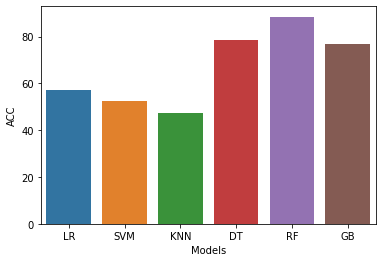

In [162]:
sns.barplot(final_data['Models'],final_data['ACC'])

In [164]:
X=data.drop('output',axis=1)
y=data['output']

In [165]:
from sklearn.ensemble import RandomForestClassifier

In [166]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [167]:
# Prediction on New Data
import pandas as pd

In [173]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
     'slope':2,
    'ca':2,
    'thall':3,    
},index=[0])

In [174]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thall
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [209]:
p = rf.predict(new_data)
if p[0]==1:
    print(" Hay patient No Disease ")
else:
    print("Disease is there")

Disease is there


C:\Users\chuli\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- ca
- exang
- slope
- thalach
- trestbps
Feature names seen at fit time, yet now missing:
- caa
- exng
- slp
- thalachh
- trtbps

  warnings.warn(message, FutureWarning)


In [186]:
#. Save Model Using Joblib
import joblib

In [194]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [195]:
model=joblib.load('model_joblib_heart')

In [196]:
model.predict(new_data)

C:\Users\chuli\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- ca
- exang
- slope
- thalach
- trestbps
Feature names seen at fit time, yet now missing:
- caa
- exng
- slp
- thalachh
- trtbps

  warnings.warn(message, FutureWarning)


array([0], dtype=int64)

In [197]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [198]:
data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [206]:
#GUI
from tkinter import*
import joblib

In [1]:
from tkinter import *
import joblib
import numpy as np
from sklearn import *
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
    
master = Tk()
master.title("Heart Disease Prediction System by Chulindra")


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "yellow", fg = "black"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP(Cerebral palsy)").grid(row=3)
Label(master, text="Enter Value of trestbps(resting blood)").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang(Exercise induced angina )").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca(coronary artery").grid(row=12)
Label(master, text="Enter Value of thallium stress").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

C:\Users\chuli\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\chuli\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


model=joblib.load('model_joblib-heart')